### general functions

In [0]:
%xmode Verbose

from scipy.stats import norm
import numpy as np


def std_samp(a):      # np.std(x, ddof=1)
    mean = np.mean(a)
    errlist = []
    for i in a:
         err = abs(i - mean)
         errlist.append(err)

    sqrderrs = [i**2 for i in errlist]
    sample_variance = np.sum(sqrderrs)/(len(sqrderrs)-1)
    return np.sqrt(samplevariance)



#For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
# var_a = a.var(ddof=1)


z_value0 = 3 # distance
p_value0 = 0.001    # propability
p_value = norm.cdf(z_value0)    # 3 stds away from the mean is 0.1%
z_value = norm.ppf(p_value0)    # 0.1% is 3 std away from the mean
print(z_value)
print(p_value)


from matplotlib import colors
for i in colors._colors_full_map.keys():
  # print(i)
  pass

Exception reporting mode: Verbose
-3.090232306167813
0.9986501019683699


### sampling distribution of sample proportion

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson


# an example of a distribution that is not going to be normal is the distribution of
# sample_proportion when multiple samples is drawn out of a population to estimate the population mean if:
# n(1-p) or np are less than ten, where n is the number of individual in each sample,
# p is the population proportion
# 
a = np.random.randint(0, 2, 1000)  # 1000 coin toss a.mean() should be around 50%(fair coin)


def generate_unfair_coin(p, tosses) :
    lst1 = int(np.ceil(p * tosses)) * [1]
    lst0 = int(np.ceil((1 - p) * tosses) - 1) * [0]
    lst = lst1 + lst0
    indx = np.random.randint(0, tosses- 1, tosses)
    shuffeledlist = []
    for i in range(tosses) :
        thisiterindx = indx[i]
        shuffeledlist.append(lst[thisiterindx])
    return np.array(shuffeledlist)


def random_sampler(population, n) :
    sample = []
    zz = np.random.randint(0, len(population) - 1, n)
    for k in zz :
        sample.append(population[k])
    return sample


def generate_some_samples(numberofsamples, coin) :  # draw some sample of 50 tosses out of this population
    matrix_of_samples = np.zeros([numberofsamples, len(coin)])
    for j in range(numberofsamples) :
        matrix_of_samples[j, :] = random_sampler(coin, len(coin))
    lst_of_sample_proportions = []
    for i in range(numberofsamples) :
        proportion_of_each_sample = matrix_of_samples[i, :].mean() #/ numberofsamples
        lst_of_sample_proportions.append(proportion_of_each_sample)
    return lst_of_sample_proportions


# here the  distribution is that of the sample population
# (when we have many samples, what would be the shape of distribution of each one's proportion)
# that the distributing of the samples proportion would not be normal
# the rule is np and n(1-p) should be both larger than 10 (arguments of generate unfair coin)


# The sampling distribution of a sample proportion p-hat is approximately normal as long as the expected number of successes and failures are both at least 10.
a = generate_unfair_coin(.5,1000)        # the arguments are p and n, the normality test shoud hold for the distributions of different samples if np and nQ are both > 10
data = generate_some_samples(5000, a)
# the variable that I have is p, the number of tossess per coin, number of coins, number of samples drawn from each coin 





stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05 :
    print('Probably Gaussian')
else :
    print('Probably not Gaussian')


stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05 :
    print('Probably Gaussian')
else :
    print('Probably not Gaussian')


result = anderson(data)
print('stat=%.3f' % (result.statistic))

for i in range(len(result.critical_values)) :
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv :
        print('Probably Gaussian at the %.1f%% level' % (sl))
    else :
        print('Probably not Gaussian at the %.1f%% level' % (sl))


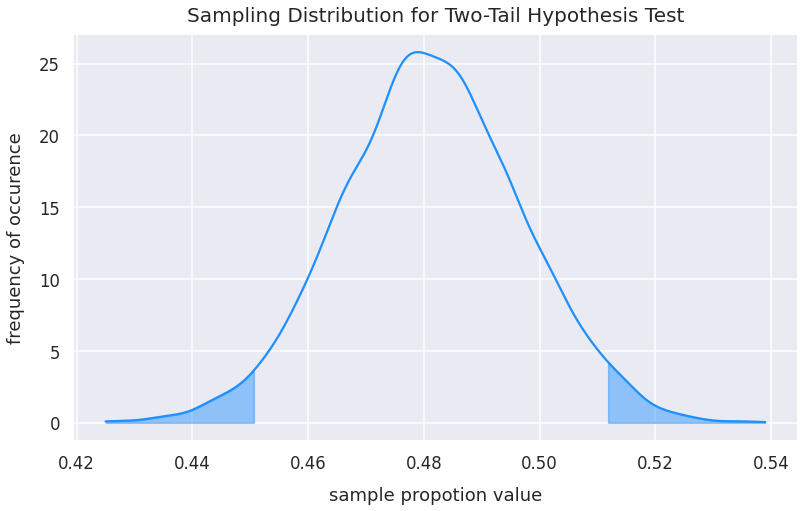

In [0]:
values = np.array(data)
alpha_05_positive = np.mean(values) + np.std(values)*1.96
alpha_05_negative = np.mean(values) - np.std(values)*1.96
kde = stats.gaussian_kde(values)
pos = np.linspace(np.min(values), np.max(values), 10000)
plt.plot(pos, kde(pos), color='dodgerblue')
shade = np.linspace(alpha_05_positive, np.max(values), 300)
plt.fill_between(shade, kde(shade), alpha=0.45, color='dodgerblue')
shade2 = np.linspace(alpha_05_negative, np.min(values), 300)
plt.fill_between(shade2, kde(shade2), alpha=0.45, color='dodgerblue')
plt.title("Sampling Distribution for Two-Tail Hypothesis Test", y=1.015, fontsize=20)
plt.xlabel("sample propotion value", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);

In [0]:
a = plt.hist(data, bins=10)

### sample mean with class human


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import anderson
from scipy.stats import shapiro
from scipy.stats import normaltest
import random

class human():
  def __init__(guy):#, height, sex):
    guy.height = random.randint(147,185)
    guy.sex = random.randint(0,1)
    guy.isrich = isrich
    pass

  def height():
    return random.randint(147,185)
  def sex():
    return random.randint(0,1)
  def isrich(p):
    lst1 = int(np.ceil(p *1000)) * [1]
    lst0 = int(np.ceil((1 - p)*1000) - 1) * [0]
    lst = lst1 + lst0
    return lst[random.randint(0,998)]

def sample(samplesize, attribute, proportion="p"): # 
  """
return a population of some entities 
these entities are not humans
it returns a list of samples taken form a population of humans given the sample size needed and which of attribute of human it is studing
the mean of this list is x-bar=np.mean(sample()) an avarage of a sample
while the mean of  [sample(10, height) for i in range(3)] is μ-xbar 
the mean of 3 studies each studing sample of 10 humans = np.mean([sample() for i in range(3)])
   """
  lst = []
  if attribute == "sex":
      for i in range(samplesize):
        lst.append(human.sex()) 
  elif attribute == "height":
      for i in range(samplesize):
        lst.append(human.height())
  elif str(attribute).startswith("ri"):
      for i in range(samplesize):
        lst.append(human.isrich(proportion))

  return lst 

data = [np.mean(sample(10, "height")) for i in range(10)]   
print(data)
print(np.mean(data))
hio = plt.hist(data , bins=40 ) 

172.6

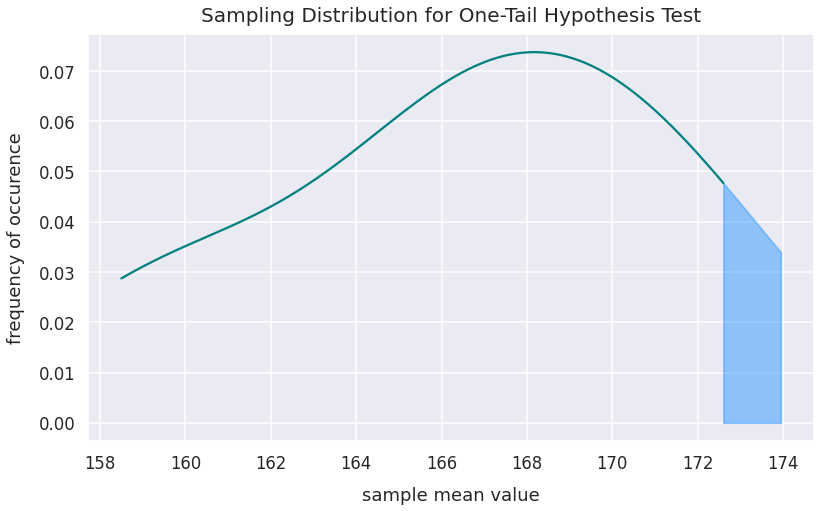

In [0]:
values =data    
two_std_from_mean = np.mean(values) + np.std(values)*1.645    # extream samples
kde = stats.gaussian_kde(values)
pos = np.linspace(np.min(values), np.max(values), 10000)
plt.plot(pos, kde(pos), color='teal')
shade = np.linspace(two_std_from_mean, np.max(values), 300)
plt.fill_between(shade, kde(shade), alpha=0.45, color='dodgerblue')
plt.title("Sampling Distribution for One-Tail Hypothesis Test", y=1.015, fontsize=20)
plt.xlabel("sample mean value", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);
np.max(values)

In [0]:
data = [np.mean(sample(10, "height")) for i in range(200)] 
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05 :
    print('Probably Gaussian')
else :
    print('Probably not Gaussian')


stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05 :
    print('Probably Gaussian')
else :
    print('Probably not Gaussian')


result = anderson(data)
print('stat=%.3f' % (result.statistic))

for i in range(len(result.critical_values)) :
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv :
        print('Probably Gaussian at the %.1f%% level' % (sl))
    else :
        print('Probably not Gaussian at the %.1f%% level' % (sl))


stat=0.990, p=0.178
Probably Gaussian
stat=3.877, p=0.144
Probably Gaussian
stat=0.464
Probably Gaussian at the 15.0% level
Probably Gaussian at the 10.0% level
Probably Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


### getting lost 

In [0]:
data = [np.mean(sample(2, "height")) for i in range(500)]
data = [np.mean(sample(1, "height")) for i in range(1000)]

# data = [np.mean(sample(10, "height")) for i in range(10)]
# data = [np.mean(sample(100, "height")) for i in range(1)]
data = [np.mean(sample(1, "height", proportion=0.9)) for i in range(8)] 



print(shapiro(data))
print(normaltest(data))
result = anderson(data)


print('stat=%.3f' % (result.statistic))
for i in range(5):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < cv:
		print("the significance level is ", sl, " the critical level is ", cv, " and the and the statistic is ",  result.statistic, " so it is proprobably normal")
	else:
		print("the significance level is ", sl, " the critical level is ", cv, " and the and the statistic is ",  result.statistic, " so it is proprobably normal")

# a = plt.hist(data , bins=38 )
# data




In [0]:
import math
d = sample(40, "height")
np.var(d) /40

In [0]:

# help(np.var)
0.7/math.sqrt(50)
math.sqrt(0.04) 

hits = 142
n = 250 
p = hits/250 # proportion


sample_var =-( ((1-hits)*1-p) + (hits*(1)) )/(n-1)
samplestd = math.sqrt(p*(1-p)/n)

#samplemean = 350 
#samplestd = 25
#samplevar = samplestd **2 
#popvar = samplevar * n
#popstd = math.sqrt(popstd)

# print(histsamplevar / popvar)

print(sample_var)
samplestd

np.var([142, 250-142])

sample_var

In [0]:
# compare sample variance and population variance 

population = np.arange(1,100,.01)
z = np.var(population)

def sampler(population,n):
  lst = []
  zz = np.random.randint(0, len(population) - 1, n)
  for k in zz :
        lst.append(population[k])
  return lst



for i in range(10):
  a = np.random.randint(20,50)
  sample = sampler(population, a)
  mean = np.mean(sample)
  std = np.std(sample)
  std = std / np.sqrt(a)
  print([mean - 2*std, mean +2*std])
  uncorr = np.var(sampler(population, a))
  correction = a / int(a-1)

  corr = uncorr * correction
  print("the corrected variance is ", corr, "while the population variance is ", z, 'but the uncorrected is ', uncorr)



In [0]:
 import matplotlib.pyplot as plt
 from scipy import stats
 numargs = stats.invgauss.numargs
 [ mu ] = [0.9,]*numargs
 rv = stats.invgauss(mu)

 x = np.linspace(0,np.minimum(rv.dist.b,3))
 h=plt.plot(x,rv.pdf(x))

 prb = stats.invgauss.cdf(x,mu)
 h=plt.semilogy(np.abs(x-stats.invgauss.ppf(prb,c))+1e-20)

 R = stats.invgauss.rvs(mu,size=100)

In [0]:
 from scipy.stats import invgauss
 import matplotlib.pyplot as plt
 fig, ax = plt.subplots(1, 1)


 mu = 0.145
 mean, var, skew, kurt = invgauss.stats(mu, moments='mvsk')

 x = np.linspace(invgauss.ppf(0.01, mu),
                 invgauss.ppf(0.99, mu), 100)
 ax.plot(x, invgauss.pdf(x, mu),
        'r-', lw=5, alpha=0.6, label='invgauss pdf')
# Alternatively, the distribution object can be called (as a function) to fix the shape, location and scale parameters. This returns a “frozen” RV object holding the given parameters fixed.



 rv = invgauss(mu)
 ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
# Check accuracy of cdf and ppf:


 vals = invgauss.ppf([0.001, 0.5, 0.999], mu)
 np.allclose([0.001, 0.5, 0.999], invgauss.cdf(vals, mu))

# Generate random numbers:


 r = invgauss.rvs(mu, size=1000)

 ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
 ax.legend(loc='best', frameon=False)
 plt.show()

### what is the probability of getting 40 tails out of 100 tossess



>$\frac{n!}{k!(n-k)!} = {n \choose k}$

0.028443966820490392
0.02275013194817921
0.0175


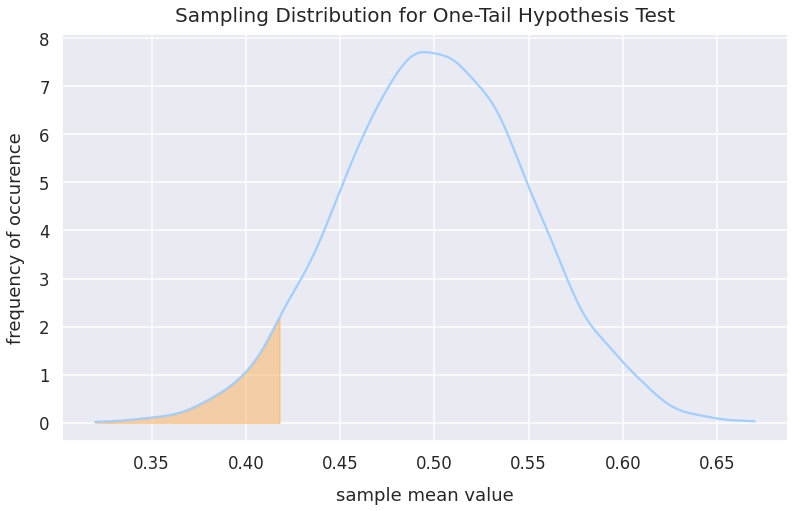

In [0]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import math
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(rc={'figure.figsize':(13, 7.5)})
sns.set_context('talk')

# what is the probablity of getting 40 tails out of 100 tossess


population_proportion = 0.5
successes = 40
trials = 100

memory = {}
def fact(n) :  
    if n <= 1 :  
        memory[n] = 1
        return memory[n]
    memory[n] = n * fact(n - 1)
    return math.gamma(n+1) #memory[n]  # ladder
 
# from scipy.special import comb

def choose(trials,successes):   # of all possible outcomes, how many trials have that number of successes 
    ''' let nCk be n choose k where n = trials and k = successess'''
    return fact(trials)/(fact(trials - successes) * fact(successes))

def permutaion(trials,successes):   
    ''' let nPk be n Pick k where n = trials and k = successess'''
    return fact(trials)/(fact(trials - successes))

def Binomial_pdf(trials, successes, probability_of_success):
    return (choose(trials,successes)) * (probability_of_success ** successes) * ((1 - probability_of_success) ** (trials - successes))

def Binomial_cdf(trials, successes, probability_of_success):    # probibiliy of getting this number of successes or less
    lst = []
    for i in range(successes + 1):
        lst.append(Binomial_pdf(trials, i, probability_of_success))
    return sum(lst)

print(Binomial_cdf(trials,successes,population_proportion))


# conditions for inferance :
# random
# distribution of diffrent samples sample should be normal as np and n(1-p) > 10
# sample/population < 0.1

sampleproportion= successes/trials
var = population_proportion*(1-population_proportion)   # pq
std = np.sqrt(var)
stdofsamplesdistribution = std/ np.sqrt(trials)
z_value = (population_proportion - sampleproportion )/ stdofsamplesdistribution
print((1-stats.norm.cdf(z_value)))      # out of the table 
# that is the probability of getting a proportion of 0.4 given that the coin is fair 
# the p_value of getting a sample that is far way from hypothesis mean by the z_value given that the hypothesis mean is true 



m = 1000000 ##population of tosses in the null scenario
lst1 = [1] * int(population_proportion * m)
lst0 = [0] * int((1-population_proportion) * m )
lst = lst1 + lst0

def sampler(n=100):
  samp = []
  for i in range(n):     # samples of 100 tosses # the independce rule of n_sample/n_population is less than 10%
    samp.append(lst[np.random.randint(0,len(lst))])
  return samp


plist =[]

for i in range(10000):    # draw 10000  samples to check their distribution # the null scenario 
  a = sampler()
  sampleproportion = np.sum(a) / len(a)
  plist.append(sampleproportion)

count = 0       # how many samples has a proporiton less than 0.4 
for i in plist:
  if i < successes/trials:
    count = count +1 

print(count/10000)



values = np.array(plist)

pos = np.linspace(np.min(values), np.max(values), 10000)


two_std_from_mean = np.mean(values) - np.std(values)*1.645
kde = stats.gaussian_kde(values)

plt.plot(pos, kde(pos), color='xkcd:baby blue')


shade = np.linspace(np.min(values), two_std_from_mean, 300)
plt.fill_between(shade, kde(shade), alpha=0.45, color='xkcd:light orange')
plt.title("Sampling Distribution for One-Tail Hypothesis Test", y=1.015, fontsize=20)
plt.xlabel("sample mean value", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);

NameError: ignored

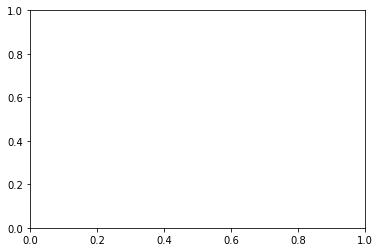

In [0]:
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

p = 0.3
mean, var, skew, kurt = bernoulli.stats(p, moments='mvsk')

x = np.arange(bernoulli.ppf(0.01, p),
              bernoulli.ppf(0.99, p))
ax.plot(x, bernoulli.pmf(x, p), 'bo', ms=8, label='bernoulli pmf')
ax.vlines(x, 0, bernoulli.pmf(x, p), colors='b', lw=5, alpha=0.5)

rv = bernoulli(p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
         label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

In [0]:
import math
import numpy as np

memory = {}

def fact(n) :  
    if n <= 1 :  
        memory[n] = 1
        return memory[n]
    memory[n] = n * fact(n - 1)
    return math.gamma(n+1) #memory[n]  # ladder
 
# from scipy.special import comb

def choose(trials,successes):   # of all possible outcomes, how many trials have that number of successes 
    ''' let nCk be n choose k where n = trials and k = successess'''
    return fact(trials)/(fact(trials - successes) * fact(successes))

def permutaion(trials,successes):   
    ''' let nPk be n Pick k where n = trials and k = successess'''
    return fact(trials)/(fact(trials - successes))

def Binomial_pdf(trials, successes, probability_of_success):
      return (choose(trials,successes)) * (probability_of_success ** successes) * ((1 - probability_of_success) ** (trials - successes))


Binomial_pdf(20,5,0.25)

0.2023311518569244

- if the null hypothesis is true and the coin have 0.5 chance of landing on each side, and 
- and if we conducted sufficient number of experiments using the exact same criteria, 
- we can get this exact result or even more extreem results just by random chance 
- in around 1 out of 20 experiments a result of that extreemntess will show up

In [0]:
population_proportion = .35
successes = 12
trials = 24

print(Binomial_cdf(trials,successes,population_proportion))

sampleproportion= successes/trials
var = population_proportion*(1-population_proportion)   # pq
std = np.sqrt(var)
stdofsamplesdistribution = std/ np.sqrt(trials)
z_value = abs(population_proportion - sampleproportion )/ stdofsamplesdistribution
print(z_value)
print(1-(stats.norm.cdf(z_value)))      

0.9577469252010945
1.5406577730392865
0.06170004954971342


In [0]:
population_proportion = 0.5 # the proportion according to the null hypothesis

trials = 200
success = 113 
p = success/trials
var = population_proportion*(1-population_proportion)
std = np.sqrt(var)
stderr = std/ np.sqrt(trials)
z_value = abs(p - population_proportion)/ stderr
print(z_value)
p_value = 1-stats.norm.cdf(z_value)      # out of the table (this is the probility of obtaing a sample that far away form the hypothesis just by normal chance)(given that the null hypothesis is true)
print(p_value)

1.8384776310850222
0.0329960275296739


### T-test

In [0]:
 from scipy import stats
 np.random.seed(12345678)

 rvs1 = stats.norm.rvs(loc=5,scale=10,size=500)
 rvs2 = stats.norm.rvs(loc=5,scale=10,size=500)
 rvs3 = stats.norm.rvs(loc=5, scale=20, size=500)
 rvs4 = stats.norm.rvs(loc=5, scale=20, size=100)
 rvs5 = stats.norm.rvs(loc=8, scale=20, size=100)

 stats.ttest_ind(rvs1, rvs3)
 stats.ttest_ind(rvs1, rvs3, equal_var = False)

 stats.ttest_ind(rvs1, rvs4)
 stats.ttest_ind(rvs1, rvs4, equal_var = False)

 stats.ttest_ind(rvs1, rvs5)
 stats.ttest_ind(rvs1, rvs5, equal_var = False)

 print(stats.ttest_ind(rvs1,rvs5))
 print(stats.ttest_ind(rvs5,rvs1))

Ttest_indResult(statistic=-1.467966985449067, pvalue=0.14263895620529113)
Ttest_indResult(statistic=1.467966985449067, pvalue=0.14263895620529113)


In [0]:
import numpy as np
from scipy import stats

def checker(diffrence_of_means, N, numberofchecks):
  for i in range(numberofchecks):
     a = np.random.randn(N) + diffrence_of_means
     b = np.random.randn(N)

     var_a = a.var(ddof=1)
     var_b = b.var(ddof=1)

     s = (var_a + var_b) /2
     s = np.sqrt(s) #std deviation
     s = s / np.sqrt(N/2)

     t = (a.mean() - b.mean())/(s)  ## Calculate the t-statistics

     df = 2*N - 2

     p = 1 - stats.t.cdf(t,df=df) #p-value after comparison with the t 
     # print("t = " + str(t))
     
     print("p = " + str(2*p))

     ### You can see that after comparing the t statistic with the critical t value (computed internally) we get a good p value of 0.0005 and thus we reject the null hypothesis and thus it proves that the mean of the two distributions are different and statistically significant.


     t2, p2 = stats.ttest_ind(a,b)## Cross Checking with the internal scipy function

     # print("t = " + str(t2))
     print("p = " + str(p2))
     if p2>0.05:
       print("diffrence")
     else:
       print("no diffrence")

checker(.05,10,5)

p = 1.977699571364208
p = 0.022300428635792
no diffrence
p = 1.4977116531251269
p = 0.5022883468748731
diffrence
p = 1.9639671078217462
p = 0.03603289217825377
no diffrence
p = 1.5404457072586273
p = 0.4595542927413728
diffrence
p = 0.5340755827891481
p = 0.5340755827891484
diffrence


In [0]:
populationmean = 1.2 # the null hypothesis mean
samplemean = 1.05
samplestd = .5
samplesize = 100
stderr = samplestd / np.sqrt(samplesize)
# print(stderr)
statistic = -abs(populationmean - samplemean) / stderr
print(statistic)

df= samplesize-1
t= statistic
p =stats.t.cdf(t,df=df)
# p= stats.norm.cdf(z)   # for normal 
p*100

### Stirlings approximation of factorials

>$$\sqrt{2\pi n}(\frac{n}{e})^n$$

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math

# x! = math.gamma(x +1)

def Stirlingsapproximation(n):
  firstterm = np.sqrt(2*np.pi*n)
  secondterm = (n/np.e)**n
  return firstterm*secondterm

x = np.arange(1,100,1)
y=[]

for i in x:
   y.append(math.gamma(i+1)/6**i)
   # print("for ", i, "the gamma is ",math.gamma(i+1), "my function is ", fact(i) )
    
   # y.append(math.gamma(i+1)/Stirlingsapproximation(i))

# plt.plot(x,y)



### integration


$$I(a,b)\int_{0}^{1}ax^2+bdx$$

>$$E_{n}(x) = \int_{1}^{\inf}\frac{e^{-xt}}{t^n}dt$$

In [0]:
 ## this is how to integrate a function generatlly 
 
 from scipy.integrate import quad
 def integrand(x, a, b):
     return a*x**2 + b

 a = 2
 b = 1
 I = quad(integrand, 0, 1, args=(a,b))
 

 def integrand(t, n, x):
     return np.exp(-x*t) / t**n


 def expint(n, x):
     return quad(integrand, 1, np.inf, args=(n, x))[0]


 vec_expint = np.vectorize(expint)

 vec_expint(3, np.arange(1.0, 4.0, 0.5))


(1.6666666666666667, 1.8503717077085944e-14)

## distributions

### exponential (time)

- the normal distribution asks what is the probabilty of getting a man as tall as the 2m given the std and the mu

- the random variable is the height, and the cdf answers the probability question

- the exponintial distribution asks about the probabilty of decay given the rate of decay 

- the random variable is the occaurance of decay 

- Why did we have to invent Exponential Distribution?
To predict the amount of waiting time until the next event (i.e., success, failure, arrival, etc.).



![alt text](https://miro.medium.com/max/1400/1*oMbmNib0eyFgmK5ByPSM2w.png)

In [0]:
 from scipy.integrate import quad

 # the mean is 1/L and the vaiance is 1/L^2
 def expo_pdf(point_of_time,rate_over_an_interval):                # the pdf function parametrized by lambda(the rate parameter)
     # a key charachtaristic of any pdf is that if it is integrated from 0 to infinity it will give 1 
     return rate_over_an_interval * np.e**(-rate_over_an_interval*point_of_time)

 rate_over_an_interval = 0.2
 I = quad(expo_pdf, 0, 3, args=(rate_over_an_interval))    # integrate the pdf to get cdf (from 0 to 3 ) 
 # if something is decaying with exponintial rate of 0.2 (its avarage life is 5) then it has 45% chance of lasting less than 3 years 

def expo_cdf(rate_over_an_interval,time_frame_of_intrest):
  return 1 - np.e**(-rate_over_an_interval*time_frame_of_intrest)   # this is the analytic integrated version 



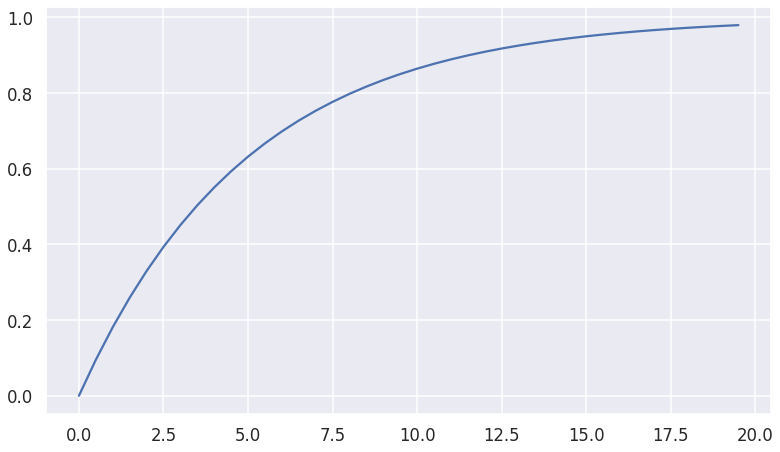

In [0]:
from scipy.integrate import quad
x = np.arange(0,20,0.5)
expo_lst = []
for i in x:
   I = quad(expo_pdf, 0, i, args=(.2))
   expo_lst.append(I[0])


import matplotlib.pyplot as plt
ax, fig = plt.subplots(1,1)
plt.plot(x,expo_lst)


### poisson (number of events)

-  Why did Poisson invent Poisson Distribution?
To predict the # of events occurring in the future!
More formally, to predict the probability of a given number of events occurring in a fixed interval of time.

- the random variable is the number of events over a time interval 

In [0]:
def poisson(rate_over_an_interval,number_of_events):
  import numpy as np
  import math
  firstterm = np.e**-rate_over_an_interval
  secondterm = (rate_over_an_interval**number_of_events) / math.gamma(number_of_events+1)
  probablity_of_that_number_of_events = firstterm * secondterm
  return probablity_of_that_number_of_events

poisson(17,17)

from scipy.integrate import quad



rate_over_an_interval = 17
I = quad(poisson, 0, 17, args=(rate_over_an_interval)) 

I

(0.43597708832774207, 6.935774564127388e-14)

In [0]:
%xmode

Exception reporting mode: Verbose


In [0]:
## comparison between binomial at (100,40-60,0.5) and poisson at(50, 40-60)

x = np.arange(40,60,0.1)
n = 100
p = .5
y = [poisson(n*p,i) for i in x]
z = [Binomial_pdf(n,i,p) for i in x]
# fig,axes = plt.subplots(1,2)
plt.plot(x,y, color="r")
plt.plot(x,z, color="b")

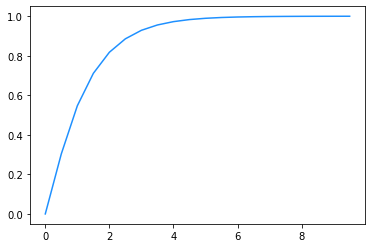

In [0]:
from scipy.integrate import quad
x = np.arange(0,10,0.5)
poisson_lst = []
for i in x:

   I = quad(poisson, 0, i, args=(.2)) 
   poisson_lst.append(I[0])

 # I = quad(binomial_pdf,0,40,args=(100,0.5))
import matplotlib.pyplot as plt
ax, fig = plt.subplots(1,1)
plt.plot(x,poisson_lst, color='dodgerblue')


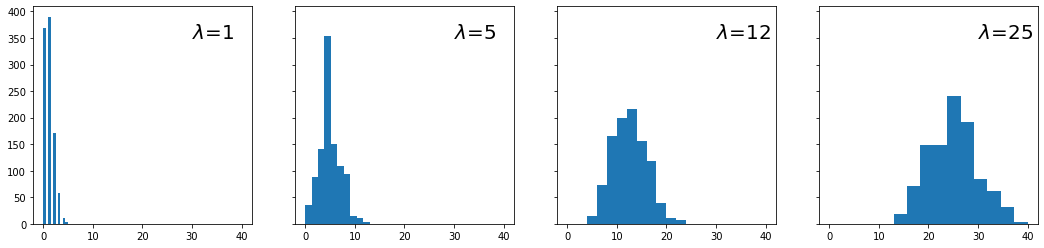

In [0]:
fig, axes = plt.subplots(1, 4, figsize=(18,4), sharex=True, sharey=True)
for i,l in enumerate([1, 5, 12, 25]):
    axes[i].hist(np.random.poisson(l, 1000), histtype="stepfilled")
    axes[i].annotate(r'$\lambda$=%i' % l, xy=(1, 1), xytext=(30, 350), fontsize=20)

### gamma 


$$p(x) =  x^{k-1}\frac{e^{-x/\theta}}{\theta^k\Gamma(k)}$$
$$p(x) =  x^{\alpha-1}\frac{\beta^\alpha e^{-x\beta}}{\Gamma(\alpha)}$$
where 𝛼 = 𝑘 and 𝜃 = 1 / 𝛽



In [0]:
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
k = 9
𝜃 = .7
a = np.random.gamma(shape=k,scale=𝜃,size=500)
𝜃 = .7

b = np.random.gamma(shape=k,scale=𝜃,size=500)
data = np.concatenate((a, b), axis=0)
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05 :
    print('Probably Gaussian')
else :
    print('Probably not Gaussian')


stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05 :
    print('Probably Gaussian')
else :
    print('Probably not Gaussian')


result = anderson(data)
print('stat=%.3f' % (result.statistic))

for i in range(len(result.critical_values)) :
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv :
        print('Probably Gaussian at the %.1f%% level' % (sl))
    else :
        print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=0.966, p=0.000
Probably not Gaussian
stat=116.696, p=0.000
Probably not Gaussian
stat=5.395
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


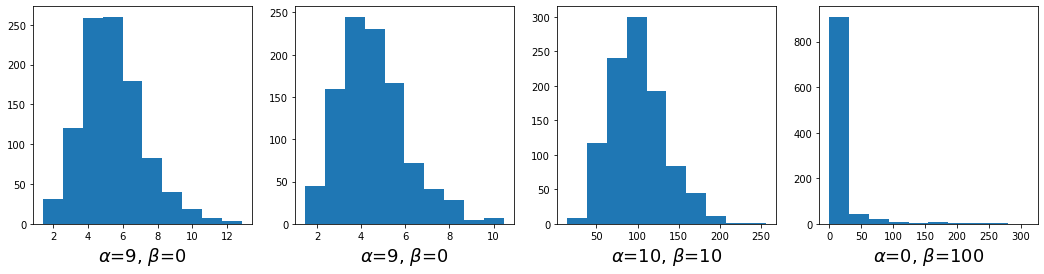

In [0]:
import matplotlib.pyplot as plt
import numpy as np


fig, axes = plt.subplots(1, 4, figsize=(18,4))
for i,p in enumerate([(10, 1), (100, 1), (10, 10), (0.1, 100)]):
    axes[i].hist(np.random.gamma(*p, size=1000), histtype="stepfilled")
    axes[i].set_xlabel(r'$\alpha$=%i, $\beta$=%i' % (p[0], p[1]), fontsize=18)

There are three different parametrizations in common use for gamma distribution:
- With a shape parameter k and a scale parameter θ.
- With a shape parameter α = k and an inverse scale parameter β = 1/θ, called a rate parameter.
- With a shape parameter k and a mean parameter μ = kθ = α/β.

The gamma distribution has been used to model the size of insurance claims and rainfalls. This means that aggregate insurance claims and the amount of rainfall accumulated in a reservoir are modelled by a gamma process – much like the exponential distribution generates a Poisson process.

In oncology, the age distribution of cancer incidence often follows the gamma distribution, whereas the shape and scale parameters predict, respectively, the number of driver events and the time interval between them.



Gamma(1, 1) distribution is the same as an Exp(1)

>Exponential distribution PDF is : 	$$p(x) = \lambda e^{-\lambda x}$$

it is used to calculate the amount of drug in blood: 

> $C_0 = C_t e^{-kt}$

> Exponential distribution is a special case of gamma distribution when $\alpha (\kappa) = 1$

Gamma distribution PDF is :

> $$p(x) =  x^{\alpha-1}\frac{\beta^\alpha e^{-x\beta}}{\Gamma(\alpha)}$$ 

- in this paper:  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5610194/ 
- gamma distribution was used to predict number of casses per 100,000 at diffrent age groups (eg 45:50 or 60:65)
- where:
- $\kappa$	 Number of carcinogenic events 
- $\beta$Average time between events, years 

###bionomial

In [0]:
def choose(trials,successes):   # of all possible outcomes, how many trials have that number of successes 
    ''' let nCk be n choose k where n = trials and k = successess'''
    return fact(trials)/(fact(trials - successes) * fact(successes))
  
def Binomial_Probability_distribution_function(trials, successes, probability_of_success):
    return (choose(trials,successes)) * (probability_of_success ** successes) * ((1 - probability_of_success) ** (trials - successes))

def Binomial_probiility_density_function(trials, successes, probability_of_success):    # probibiliy of getting this number of successes or less
    lst = []
    for i in range(successes + 1):
        lst.append(Binomial_Probability_distribution_function(trials, i, probability_of_success))
    return sum(lst)


in both poisson and exponintial distributions I defined the pdf then I integrated it to get the CDF but with the bionomial the integration yielded unpredicted and unexplained results compared to just looping and summation of the terms 

In [0]:
def biomial_cdf_by_integration(trials,successes,probability_of_success):
   from scipy.integrate import quad
   import math
   memory = {}
   def fact(n) :  
       if n <= 1 :  
          memory[n] = 1
          return memory[n]
       memory[n] = n * fact(n - 1)
       return math.gamma(n+1) #memory[n]  # ladder
   def choose(trials,successes):   # of all possible outcomes, how many trials have that number of successes 
    ''' let nCk be n choose k where n = trials and k = successess'''
    return fact(trials)/(fact(trials - successes) * fact(successes))
   def binomial_pdf(successes, trials, probability_of_success):
      return (choose(trials,successes)) * (probability_of_success ** successes) * ((1 - probability_of_success) ** (trials - successes))
   
   I = quad(binomial_pdf,0,successes,args=(trials,probability_of_success))
   return I[0]


import numpy as np
import math 
y = []
z = []
x = np.arange(0,101,1)
for i in x:
   a = Binomial_probiility_density_function(100,i,0.5)
   b =  biomial_cdf_by_integration(100,i,0.5)
   print("for ",i,"integrations = ", b, "summation = ", a)
   y.append(a)
   z.append(b)

import matplotlib.pyplot as plt
# plt.plot(x,z)


###normal

In [0]:
import numpy as np
from scipy.integrate import quad

def normal_pdf(x,s,mu):
  firstterm = s*np.sqrt(2*np.pi)
  secodterm = -0.5*pow(((x-mu)/s),2)
  return (np.e**secodterm)/firstterm

I = quad(normal_pdf, 0,2, args=(1,0))
I[0]

import matplotlib.pyplot as plt
x = np.arange(-4,4,0.01)
z = [quad(normal_pdf, 0,i, args=(1,0))[0] for i in x ]
y = [normal_pdf(i,1,0) for i in x ]
ax, fig = plt.subplots()
plt.plot(x,y , color="royalblue")#, animated=True, fillstyle="top", ls=":", lw=9 )
# plt.plot(x,z, color="royalblue")#, ls="--", lw=7)


### negative binomial distribution


Notation	
> $NB (r,   p)$

Parameters 
- r > 0  number of failures until the experiment is stopped 
- p ∈ [0,1] — success probability in each experiment (real)


In [0]:
# how to get negative binomial without knowing what it is 

# what is the distribution of probabilities of :
# the number of coin flips needed to get 3 heads if the coin was biased 0.7

# the question is answered by negative binomial 
#and the actual expected value shoud be around pr/(1-p) = 7 for r=3 and p=0.7

r = 3     
p = 0.7

# Simulate gamma means

lam = np.random.gamma(r, p/(1.-p), size=100000)     # lam is lambda the mean of poisson 
# Simulate sample Poisson conditional on lambda       # the mean of gamma is k𝜃=7

sim_vals = np.random.poisson(lam)
sim_vals.sum() / 100000.


7.00256

### others

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5610194/

Extreme value:

Y = A*(exp(−((x−t)/b)))*(exp(−exp(−((x−t)/b))))/b

Gamma:

Y = A*(x^(k−1))*(exp(−x/b))/((b^k)*gamma(k))

Logistic:

Y = A*(exp((x−t)/b))/(b*((1 + exp((x−t)/b))^2))

Normal:

Y = A*(exp(−0.5*(((x−t)/b)^2)))/(b*((2*pi)^0.5))

Weibull:

Y = A*(k/(b^k))*(x^(k−1))*exp(−((x/b)^k))

## Bayes' theorem


In [0]:
!git clone https://github.com/fonnesbeck/scipy2014_tutorial.git
!ls scipy2014_tutorial
!cat "scipy2014_tutorial/1_Introduction-to-Bayes.ipynb"


### discrete

we have system of 2 events each can claim 2 status. the overall tree has 4 possiblities each has its joint distribution. one joint distribution specifing the probability of a stutus of an event has occured. if we know the 4 joint probabilties we can get the 4 mariginal probabilities and the 8 conditional probabilities the whole 16 values have 3 degress of freedom 

- hemophilia is sex linked ressisive desease were a male was a bad copy on his x chromosome will be affected while a woman with one copy will be a carrier. 
- suppose that a woman who's a brother  had the disease. she has 0.5 chance of being a carrier if we know that she had 2 unaffected sons, what would be the probability of her being a carrier given her offspring
- the prior probability is 0.5
- the probability of a woman if she is a carrier giving birth to 2 unaffected males is 0.5*0.5=0.25 
- in the code down bellow: "s" is her offspring and L is a function that can calculate the ptobability of data(offspring) given the hypothesis (carrier = 1 and not carrier = 0)
- p is the probability of giving birth to one unaffected son given she is a carrier 
- the expression in the denominator (L(1,s) * prior + L(0,s) * (1-prior)) is the probability of the data(offspring) in general regardless of her being a carrier or no, which equals the probability of offspring given she is a carrier*prior +++ the probability of the offspring given that she is not a carrier *the probability of her being not a carrier 




In [0]:
import numpy as np
prior = 0.5 
p = 0.5 
L = lambda w,s :np.prod([     (1-i, p**i * (1-p)**(1-i))[w]     for i in s     ])
s = [0,0]
post = L(1,s) * prior / (L(1,s) * prior + L(0,s) * (1-prior))
post
L(1,s)    

### Markov chain Monte Carlo (MCMC) 

In [0]:
disasters_array = np.array([4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6,
                         3, 3, 5, 4, 5, 3, 1, 4, 4, 1, 5, 5, 3, 4, 2, 5,
                         2, 2, 3, 4, 2, 1, 3, 2, 2, 1, 1, 1, 1, 3, 0, 0,
                         1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1,
                         0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2,
                         3, 3, 1, 1, 2, 1, 1, 1, 1, 2, 4, 2, 0, 0, 1, 4,
                         0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1])

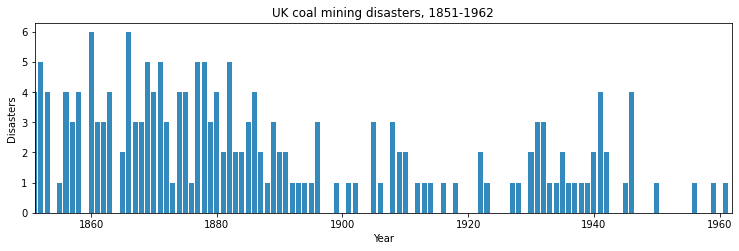

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(12.5, 3.5))
n_count_data = len(disasters_array)
plt.bar(np.arange(1851, 1962), disasters_array, color="#348ABD")
plt.xlabel("Year")
plt.ylabel("Disasters")
plt.title("UK coal mining disasters, 1851-1962")
plt.xlim(1851, 1962);

### Gibbs sampling algorithm 

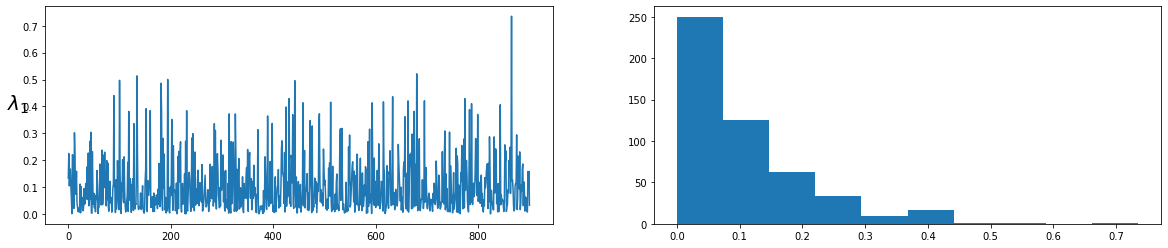

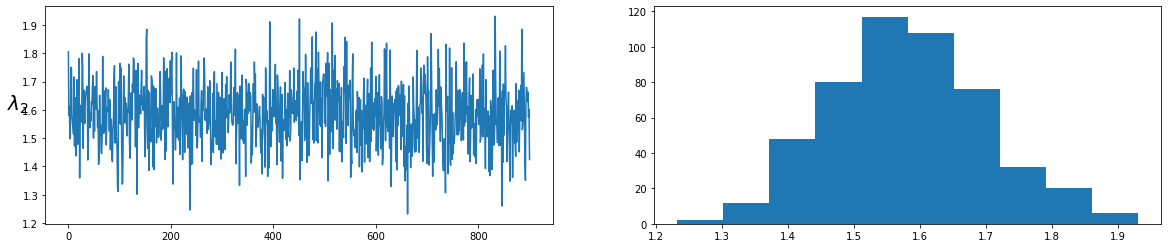

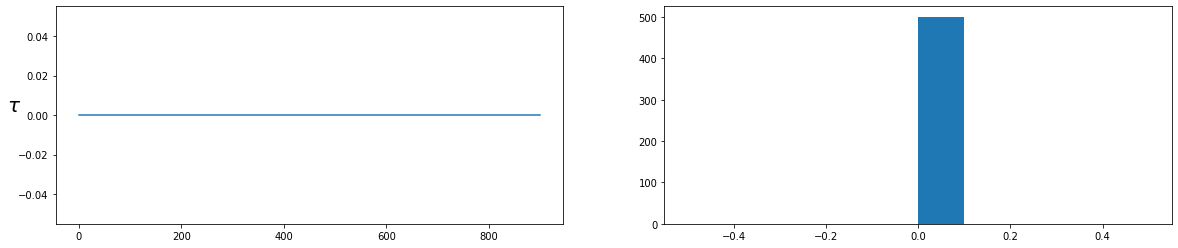

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

# Function to draw random gamma variate
rgamma = np.random.gamma
n_count_data = len(disasters_array)


def rcategorical(probs, n=None):
    # Function to draw random categorical variate
    return np.array(probs).cumsum().searchsorted(np.random.sample(n))
# Next, in order to generate probabilities for the conditional posterior of $\tau$, we need the kernel of the gamma density:

dgamma = lambda lam, a, b: lam**(a-1) * np.exp(-b*lam)

alpha, beta = 1., 10

# Specify number of iterations
n_iterations = 1000

# Initialize trace of samples
lambda1, lambda2, tau = np.zeros((3, n_iterations+1))


lambda1[0] = 6
lambda2[0] = 2
tau[0] = 0


#disasters_array[tau[0]:].sum()+alpha
np.random.gamma(57,0.01,10)

# Sample from conditionals
for i in range(n_iterations):
    # Sample early mean
    lambda1[i+1] = rgamma(disasters_array[:int(tau[i])].sum() + alpha, 1./(tau[i] + beta))
    # Sample late mean
    lambda2[i+1] = rgamma(disasters_array[int(tau[i]):].sum() + alpha, 1./(n_count_data - tau[i] + beta))
    # Sample changepoint: first calculate probabilities (conditional)
    p = np.array([dgamma(lambda1[i+1], disasters_array[:t].sum() + alpha, t + beta)*
             dgamma(lambda2[i+1], 
                    disasters_array[t:].sum() + alpha, 
                    n_count_data - t + beta)
             for t in range(n_count_data)])
    # ... then draw sample
    tau[i+1] = rcategorical(p/p.sum())


param_dict = {r'$\lambda_1$':lambda1, r'$\lambda_2$':lambda2, r'$\tau$':tau}
for p in param_dict:
    fig, axes = plt.subplots(1, 2, figsize=(20, 4))
    axes[0].plot(param_dict[p][100:])     # cut the initial values 
    axes[0].set_ylabel(p, fontsize=20, rotation=0)
    axes[1].hist(param_dict[p][int(n_iterations/2):])

In [0]:
# rcategorical([1,1,1,1,1,1,1,1,5])
import inspect 
np.array(disasters_array).cumsum()

array([  4,   9,  13,  13,  14,  18,  21,  25,  25,  31,  34,  37,  41,
        41,  43,  49,  52,  55,  60,  64,  69,  72,  73,  77,  81,  82,
        87,  92,  95,  99, 101, 106, 108, 110, 113, 117, 119, 120, 123,
       125, 127, 128, 129, 130, 131, 134, 134, 134, 135, 135, 136, 137,
       137, 137, 140, 141, 141, 144, 146, 148, 148, 149, 150, 151, 151,
       152, 152, 153, 153, 153, 153, 155, 156, 156, 156, 156, 157, 158,
       158, 160, 163, 166, 167, 168, 170, 171, 172, 173, 174, 176, 180,
       182, 182, 182, 183, 187, 187, 187, 187, 188, 188, 188, 188, 188,
       188, 189, 189, 189, 190, 190, 191])

In [0]:
import pymc3
dir(pymc3)

In [0]:
import numpy as np
a = [np.random.randn()for i in range(10000)]

np.min(np.array(a))

from scipy.stats import norm

norm.cdf(4.079284625326839)

1-0.9999774127498935

2.2587250106509416e-05

## getting lost with sympy